<a href="https://colab.research.google.com/github/PhaniChandraSekhar/AIML_Practice/blob/main/AIML_Convolution_Neural_Networrk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network (CNN)**

**Category:** Deep Learning (Supervised)

**Description:**
Specialised neural networks designed for processing grid-like data, particularly images.

**Key Components:**
- Layers: Convolutional, Pooling, Fully Connected
- Activation Functions: ReLU, Softmax
- Loss Functions: Categorical Cross-Entropy

**Example Application:**

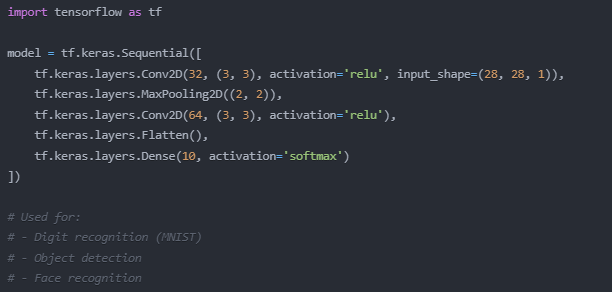


**Best Used For:**
- Image classification
- Video analysis
- Medical image diagnosis
- Facial recognition systems


**Code Implementation steps:**

**Data Preparation:**

Loads Fashion MNIST dataset
Normalizes and reshapes images
Visualizes sample images and class distribution


**Model Architecture:**

3 Convolutional blocks with BatchNormalization and Dropout
MaxPooling layers for dimensionality reduction
Dense layers for classification
Visual representation of model architecture


**Training:**

Model compilation with Adam optimizer
Training with validation split
Learning curves visualization


**Evaluation:**

Classification report with precision, recall, F1-score
Confusion matrix visualization
Sample predictions visualization
Feature map visualization


**Visualizations:**

Sample images from dataset
Class distribution
Training/validation accuracy and loss curves
Confusion matrix
Feature maps from convolutional layers



**The code includes extensive visualizations and analysis tools to understand:**

Model architecture
Training progress
Model performance
Feature extraction process

**Future improvements:**


1.   Add data augmentation techniques
2.   Implement transfer learning with pre-trained models
3.   Add more advanced visualization techniques
4.   Include model optimization techniques
5.   Add explanations for the feature maps and CNN operations







In [ ]:
# Install required libraries
!pip install tensorflow numpy pandas matplotlib seaborn sklearn plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image

In [ ]:
class FashionMNISTClassifier:
    def __init__(self):
        """Initialize the CNN classifier"""
        self.model = None
        self.history = None
        self.class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    def load_data(self):
        """Load and preprocess Fashion MNIST dataset"""
        # Load dataset
        (self.X_train, self.y_train), (self.X_test, self.y_test) = tf.keras.datasets.fashion_mnist.load_data()

        # Normalize pixel values
        self.X_train = self.X_train.astype('float32') / 255.0
        self.X_test = self.X_test.astype('float32') / 255.0

        # Reshape for CNN (add channel dimension)
        self.X_train = self.X_train.reshape(self.X_train.shape[0], 28, 28, 1)
        self.X_test = self.X_test.reshape(self.X_test.shape[0], 28, 28, 1)

        print("Training set shape:", self.X_train.shape)
        print("Testing set shape:", self.X_test.shape)

        return self.X_train, self.y_train, self.X_test, self.y_test

    def visualize_data(self):
        """Visualize sample images from the dataset"""
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i+1)
            plt.imshow(self.X_train[i].reshape(28, 28), cmap='gray')
            plt.title(self.class_names[self.y_train[i]])
            plt.axis('off')
        plt.tight_layout()
        plt.show()

        # Plot class distribution
        plt.figure(figsize=(10, 5))
        sns.countplot(x=self.y_train)
        plt.title('Class Distribution in Training Set')
        plt.xlabel('Class')
        plt.xticks(range(10), self.class_names, rotation=45)
        plt.show()

    def build_model(self):
        """Build the CNN model architecture"""
        self.model = models.Sequential([
            # First Convolutional Block
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Second Convolutional Block
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Third Convolutional Block
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Flatten and Dense Layers
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(10, activation='softmax')
        ])

        # Compile model
        self.model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

        # Print model summary
        self.model.summary()

        # Plot model architecture
        tf.keras.utils.plot_model(self.model,
                                to_file='model_architecture.png',
                                show_shapes=True,
                                show_layer_names=True)

        return self.model

    def train_model(self, epochs=10, batch_size=32):
        """Train the CNN model"""
        # Create validation split
        validation_split = 0.2

        # Train the model
        self.history = self.model.fit(
            self.X_train, self.y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=validation_split,
            verbose=1
        )

        return self.history

    def plot_training_history(self):
        """Plot training history"""
        # Plot accuracy
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['accuracy'], label='Training Accuracy')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def evaluate_model(self):
        """Evaluate the model performance"""
        # Make predictions
        predictions = self.model.predict(self.X_test)
        predicted_classes = np.argmax(predictions, axis=1)

        # Print classification report
        print("\nClassification Report:")
        print(classification_report(self.y_test, predicted_classes,
                                 target_names=self.class_names))

        # Create confusion matrix
        cm = confusion_matrix(self.y_test, predicted_classes)

        # Plot confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.class_names,
                   yticklabels=self.class_names)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.show()

        # Visualize some predictions
        plt.figure(figsize=(15, 6))
        for i in range(10):
            plt.subplot(2, 5, i+1)
            plt.imshow(self.X_test[i].reshape(28, 28), cmap='gray')
            true_label = self.class_names[self.y_test[i]]
            pred_label = self.class_names[predicted_classes[i]]
            color = 'green' if true_label == pred_label else 'red'
            plt.title(f'True: {true_label}\nPred: {pred_label}', color=color)
            plt.axis('off')
        plt.tight_layout()
        plt.show()

    def visualize_feature_maps(self, image_index=0):
        """Visualize feature maps for a sample image"""
        # Create a model that outputs feature maps
        layer_outputs = [layer.output for layer in self.model.layers if isinstance(layer, layers.Conv2D)]
        activation_model = models.Model(inputs=self.model.input, outputs=layer_outputs)

        # Get feature maps for a sample image
        activations = activation_model.predict(self.X_test[image_index:image_index+1])

        # Plot feature maps
        for i, activation in enumerate(activations):
            plt.figure(figsize=(15, 8))
            for j in range(min(16, activation.shape[-1])):  # Show first 16 channels
                plt.subplot(4, 4, j+1)
                plt.imshow(activation[0, :, :, j], cmap='viridis')
                plt.title(f'Feature Map {j+1}')
                plt.axis('off')
            plt.suptitle(f'Feature Maps from Convolutional Layer {i+1}')
            plt.tight_layout()
            plt.show()


In [ ]:
def main():
    # Create instance of classifier
    classifier = FashionMNISTClassifier()

    # Step 1: Load and preprocess data
    print("Step 1: Loading and preprocessing data...")
    X_train, y_train, X_test, y_test = classifier.load_data()

    # Step 2: Visualize data
    print("\nStep 2: Visualizing sample images and class distribution...")
    classifier.visualize_data()

    # Step 3: Build model
    print("\nStep 3: Building CNN model...")
    model = classifier.build_model()

    # Step 4: Train model
    print("\nStep 4: Training model...")
    history = classifier.train_model(epochs=10)

    # Step 5: Plot training history
    print("\nStep 5: Plotting training history...")
    classifier.plot_training_history()

    # Step 6: Evaluate model
    print("\nStep 6: Evaluating model performance...")
    classifier.evaluate_model()

    # Step 7: Visualize feature maps
    print("\nStep 7: Visualizing feature maps...")
    classifier.visualize_feature_maps()

if __name__ == "__main__":
    main()